In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog'):
    for filename in filenames[:10]:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/be9d33541d.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/4c3aa8ea6e.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/18e7abc37e.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/6a20935af5.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/e642d9ea5f.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/3f3b08f78d.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/68e7e02a47.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/f17eacf7d8.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/3f970065e5.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/7030643376.csv


In [2]:
tdcs_path = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog"
file = os.path.join(tdcs_path, "a171e61840.csv")
df = pd.read_csv(file)
print("Shape:", df.shape)
print("Head:", df.head())
print("Columns:", df.columns)

Shape: (7400, 7)
Head:    Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0     0 -9.665890  0.042550  0.184744                0     0        0
1     1 -9.672969  0.049217  0.184644                0     0        0
2     2 -9.670260  0.033620  0.193790                0     0        0
3     3 -9.673356  0.035159  0.184369                0     0        0
4     4 -9.671458  0.043913  0.197814                0     0        0
Columns: Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking'], dtype='object')


In [3]:
# Load and Inspect Data
defog_path = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog"

file_one = os.path.join(defog_path, "18e7abc37e.csv")
file_two = os.path.join(defog_path, "f17eacf7d8.csv")
file_three = os.path.join(defog_path, "68e7e02a47.csv")

print("Dataset 1:")
df_1 = pd.read_csv(file_one)
print("Shape:", df_1.shape)
print("Head:", df_1.head())
print("Columns:", df_1.columns)


print("\nDataset 2:")
df_2 = pd.read_csv(file_two)
print("Shape:", df_2.shape)
print("Head:", df_2.head())
print("Columns:", df_2.columns)


print("\nDataset 3:")
df_3 = pd.read_csv(file_three)
print("Shape:", df_3.shape)
print("Head:", df_3.head())
print("Columns:", df_3.columns)

Dataset 1:
Shape: (75076, 9)
Head:    Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  Valid  \
0     0 -0.818398 -0.015625 -0.546875                0     0        0  False   
1     1 -0.821810 -0.015625 -0.537565                0     0        0  False   
2     2 -0.819192 -0.015625 -0.531250                0     0        0  False   
3     3 -0.818965 -0.015625 -0.539780                0     0        0  False   
4     4 -0.838140 -0.015625 -0.538761                0     0        0  False   

    Task  
0  False  
1  False  
2  False  
3  False  
4  False  
Columns: Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking',
       'Valid', 'Task'],
      dtype='object')

Dataset 2:
Shape: (112666, 9)
Head:    Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  Valid  \
0     0 -1.013891  0.163125 -0.186132                0     0        0  False   
1     1 -1.018139  0.164666 -0.184647                0     0        0  False   
2     

In [4]:
# 1. Check FOG Label Distribution
print("Dataset 1:")
print("Start Hesitation:", df_1['StartHesitation'].sum())
print("Turn:", df_1['Turn'].sum())
print("Walking:", df_1['Walking'].sum())
print("Any FOG:", (df_1[['StartHesitation','Turn','Walking']].sum(axis=1) > 0).sum())

print("\nDataset 2:")
print("Start Hesitation:", df_2['StartHesitation'].sum())
print("Turn:", df_2['Turn'].sum())
print("Walking:", df_2['Walking'].sum())
print("Any FOG:", (df_2[['StartHesitation','Turn','Walking']].sum(axis=1) > 0).sum())

print("\nDataset 3:")
print("Start Hesitation:", df_3['StartHesitation'].sum())
print("Turn:", df_3['Turn'].sum())
print("Walking:", df_3['Walking'].sum())
print("Any FOG:", (df_3[['StartHesitation','Turn','Walking']].sum(axis=1) > 0).sum())

Dataset 1:
Start Hesitation: 0
Turn: 484
Walking: 0
Any FOG: 484

Dataset 2:
Start Hesitation: 0
Turn: 943
Walking: 0
Any FOG: 943

Dataset 3:
Start Hesitation: 65
Turn: 12917
Walking: 2060
Any FOG: 15042


In [5]:
# 2. Filter to Valid + Task Segments
df_1 = df_1[(df_1['Valid'] == True) & (df_1['Task'] == True)]
print("Valid/Task data shape:", df_1.shape)

df_2 = df_2[(df_2['Valid'] == True) & (df_2['Task'] == True)]
print("Valid/Task data shape:", df_2.shape)

df_3 = df_3[(df_3['Valid'] == True) & (df_3['Task'] == True)]
print("Valid/Task data shape:", df_3.shape)

Valid/Task data shape: (17408, 9)
Valid/Task data shape: (28673, 9)
Valid/Task data shape: (51008, 9)


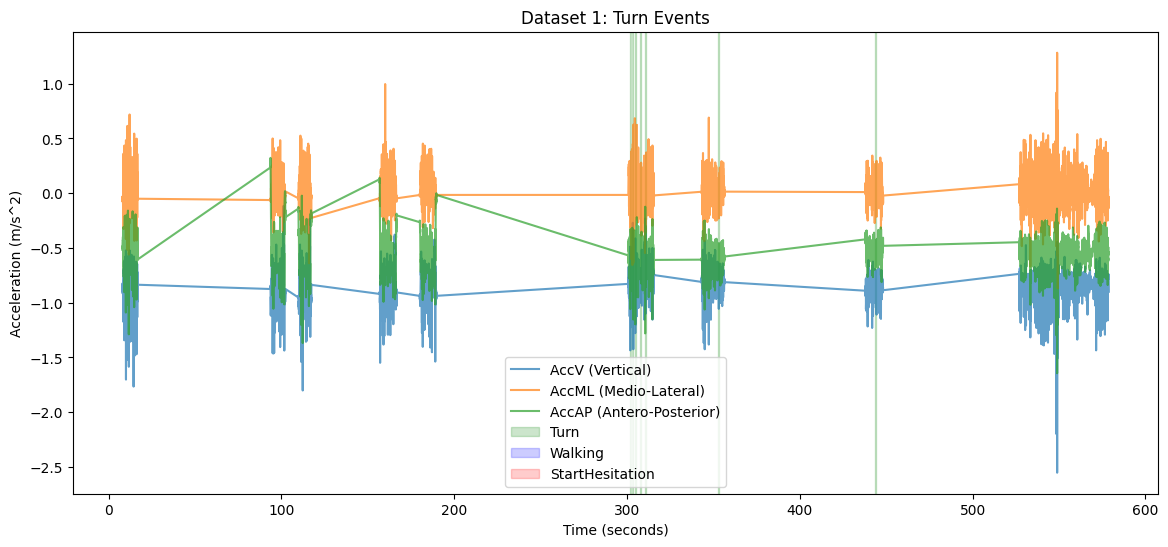

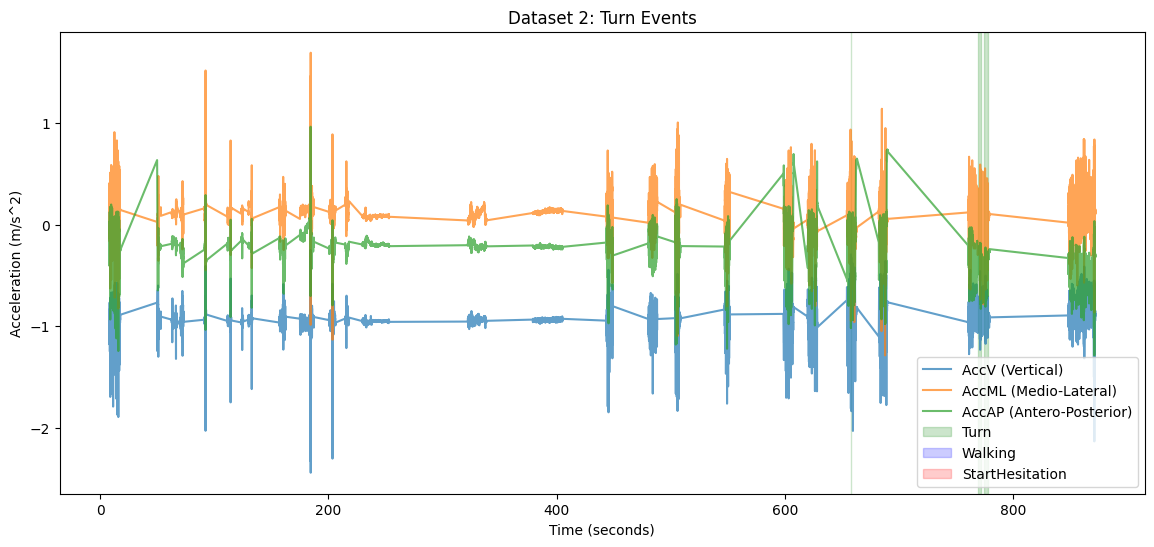

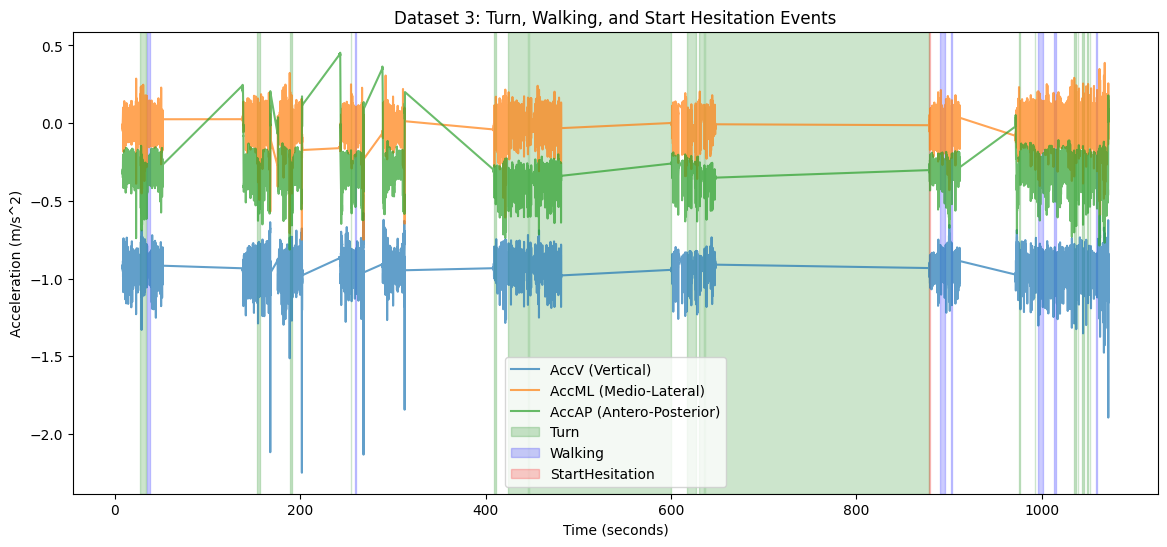

In [6]:
# 3. Plot Signals with FOG Overlay
import matplotlib.pyplot as plt

def plot_fog_events_overlay(df, title):
    """
    Plot accelerometer signals with FoG events shaded directly on the same graph.
    """
    # Convert timestamps to seconds
    df["Time_sec"] = df["Time"] / 128.0  
    
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Plot all 3 accelerometer signals
    ax.plot(df["Time_sec"], df["AccV"], label="AccV (Vertical)", alpha=0.7)
    ax.plot(df["Time_sec"], df["AccML"], label="AccML (Medio-Lateral)", alpha=0.7)
    ax.plot(df["Time_sec"], df["AccAP"], label="AccAP (Antero-Posterior)", alpha=0.7)
    
    # Define colors
    colors = {
        "Turn": "green",
        "Walking": "blue",
        "StartHesitation": "red"
    }
    
    # Shade event regions
    for event, color in colors.items():
        if event in df.columns:
            in_event = False
            start_time = None
            for t, val in zip(df["Time_sec"], df[event]):
                if val == 1 and not in_event:
                    in_event = True
                    start_time = t
                elif val == 0 and in_event:
                    in_event = False
                    ax.axvspan(start_time, t, color=color, alpha=0.2)
            if in_event:
                ax.axvspan(start_time, df["Time_sec"].iloc[-1], color=color, alpha=0.2)
    
    # Make sure each event appears once in the legend
    from matplotlib.patches import Patch
    legend_patches = [Patch(color=color, alpha=0.2, label=event) for event, color in colors.items() if event in df.columns]
    ax.legend(handles=ax.get_legend_handles_labels()[0] + legend_patches)
    
    ax.set_title(title)
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Acceleration (m/s^2)")
    plt.show()

# Example usage:
plot_fog_events_overlay(df_1, "Dataset 1: Turn Events")
plot_fog_events_overlay(df_2, "Dataset 2: Turn Events")
plot_fog_events_overlay(df_3, "Dataset 3: Turn, Walking, and Start Hesitation Events")


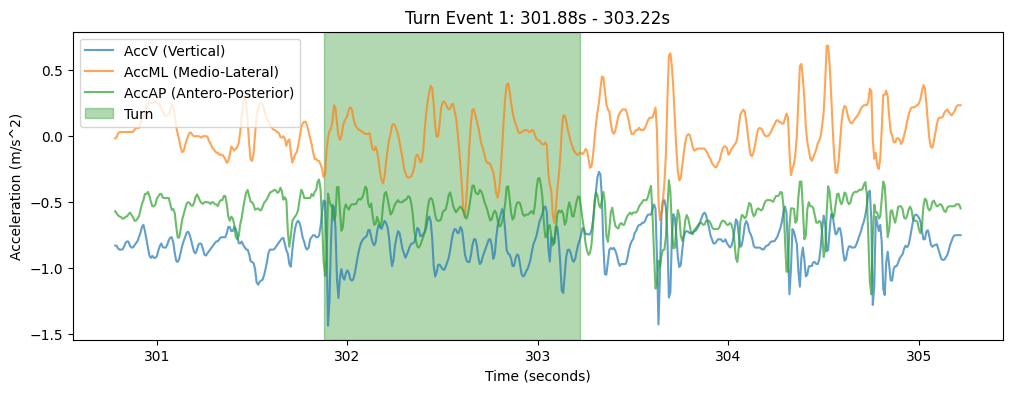

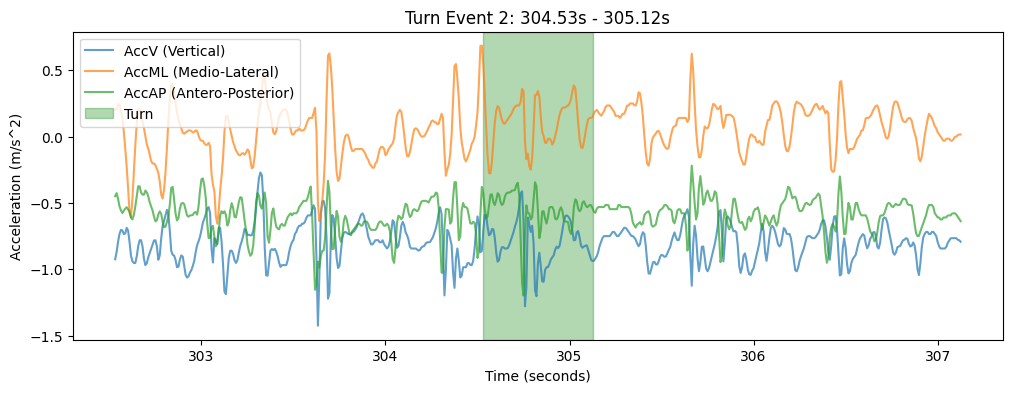

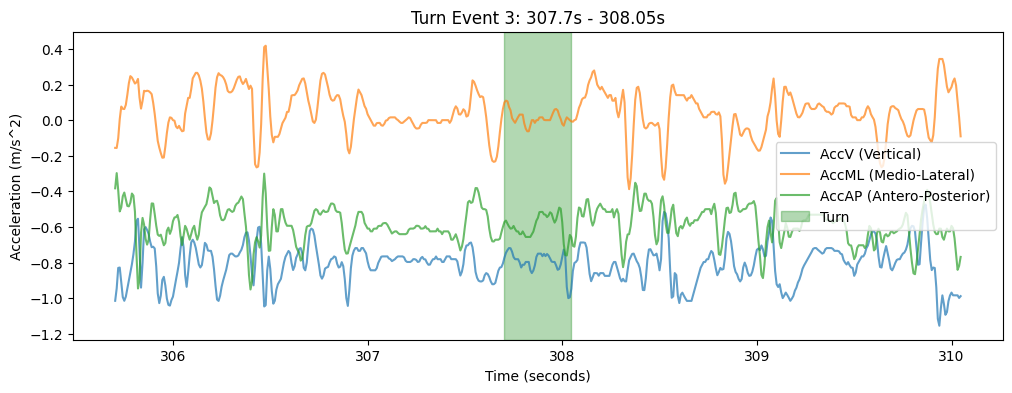

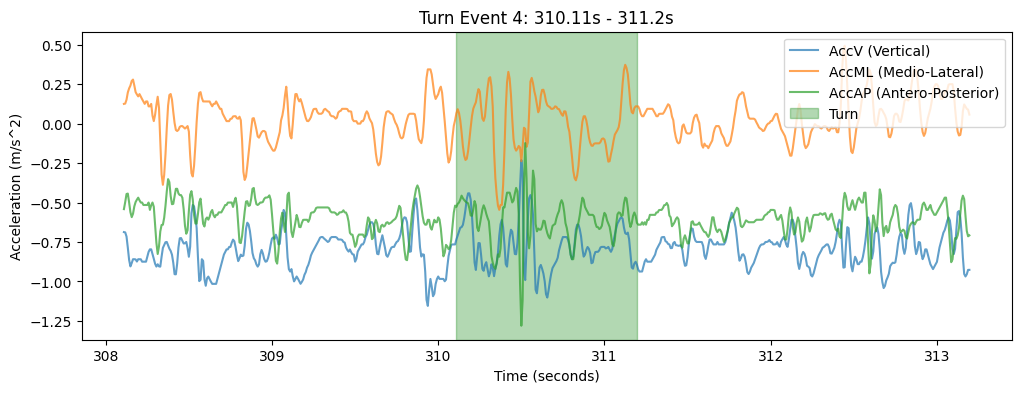

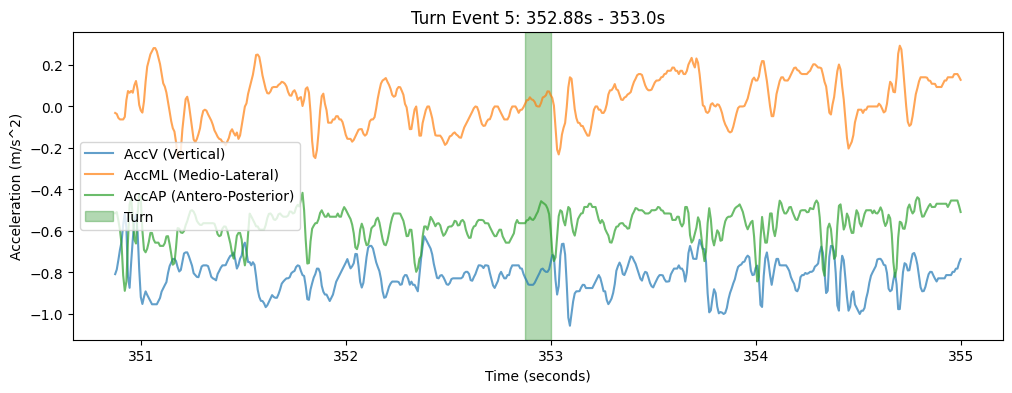

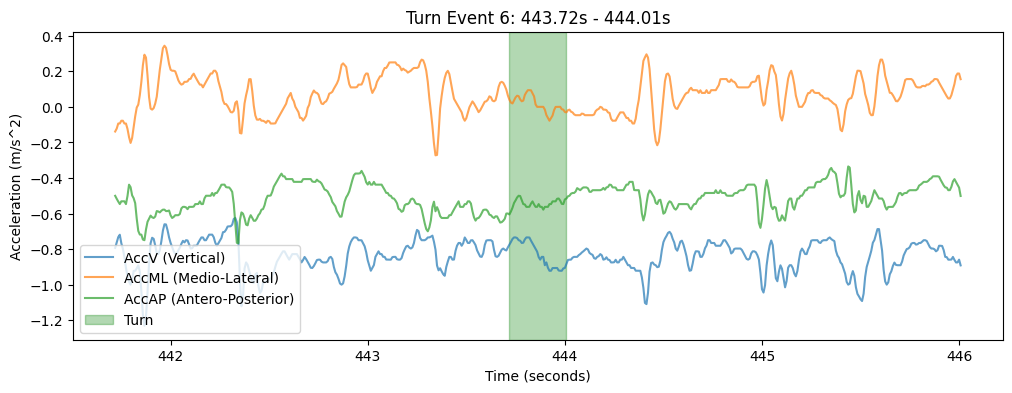

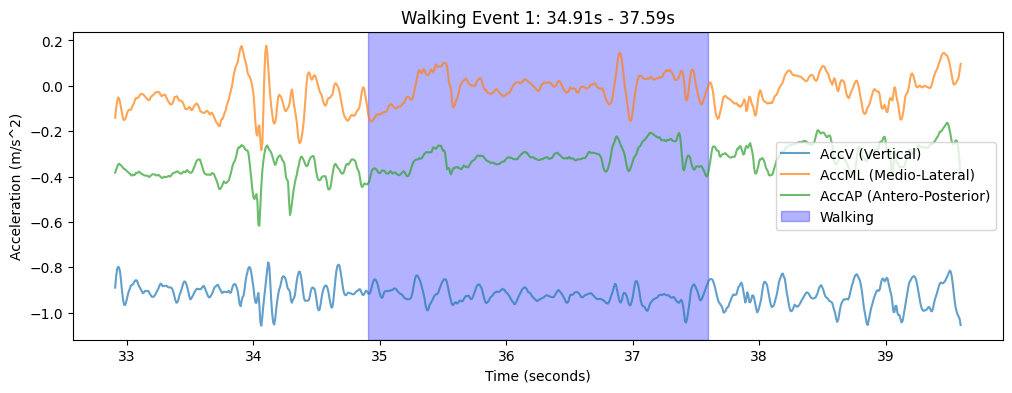

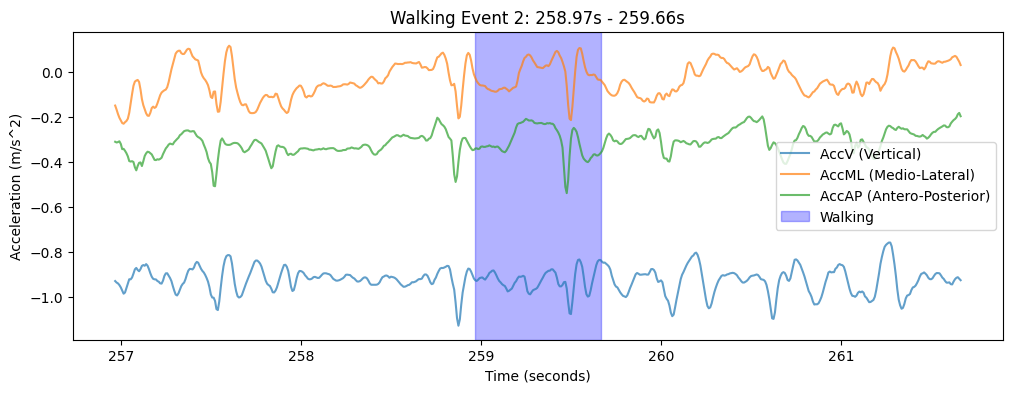

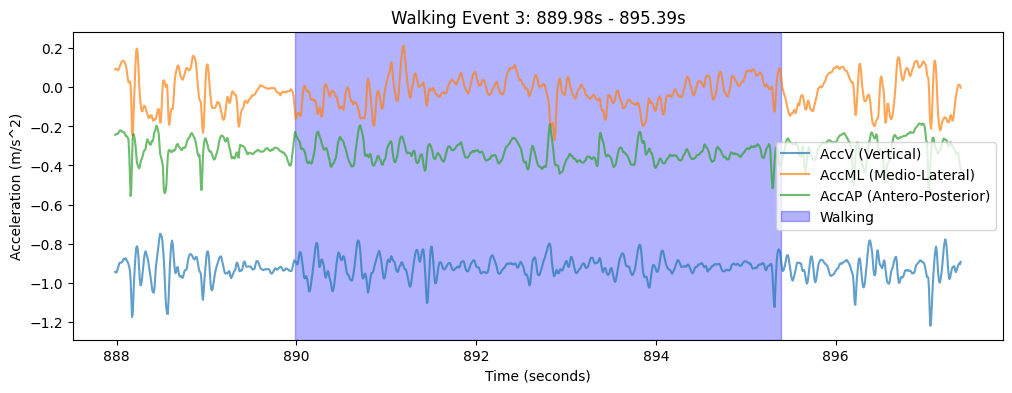

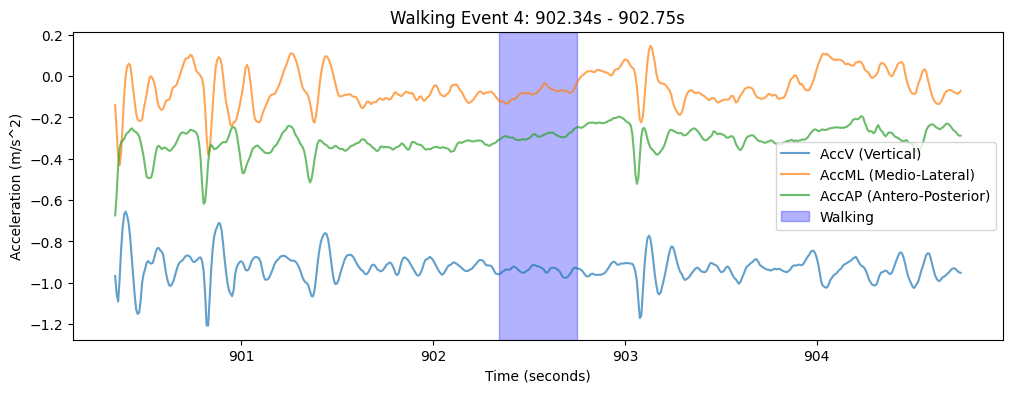

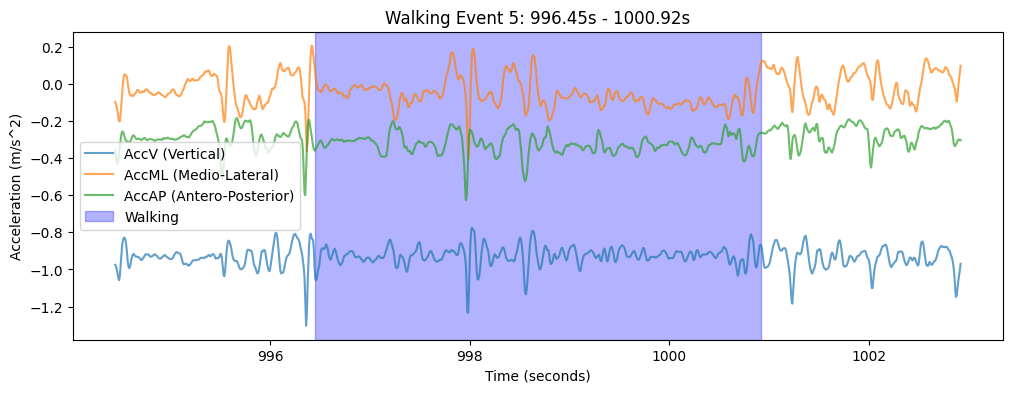

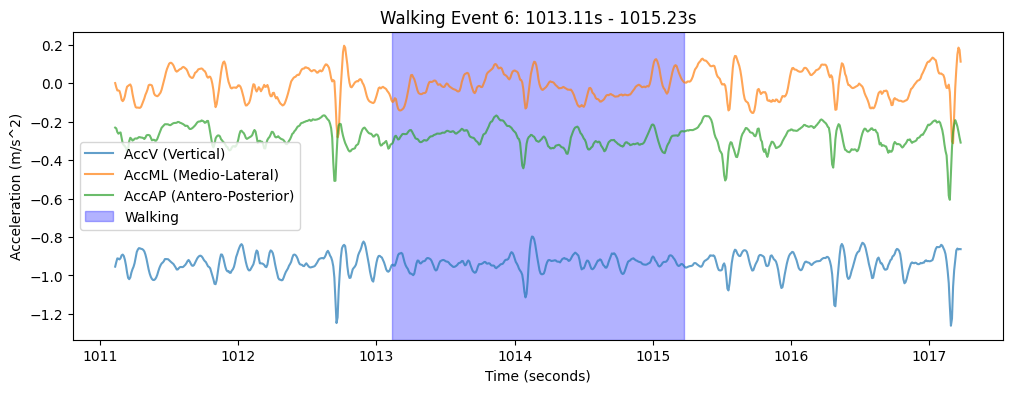

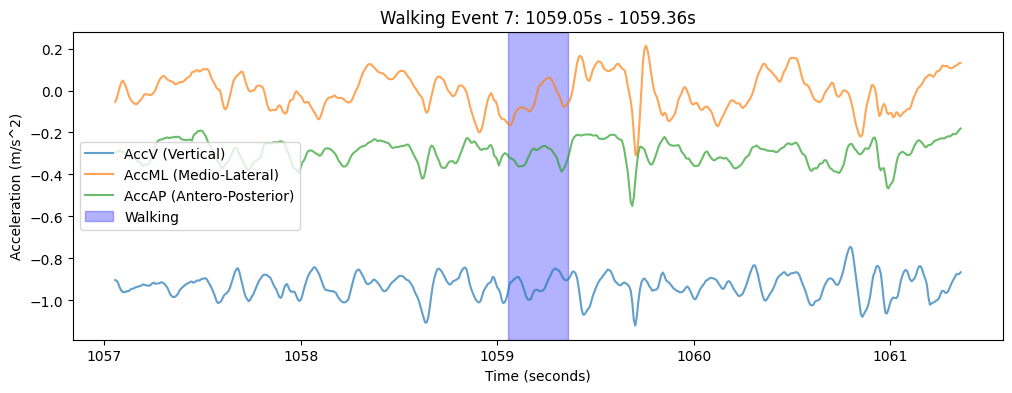

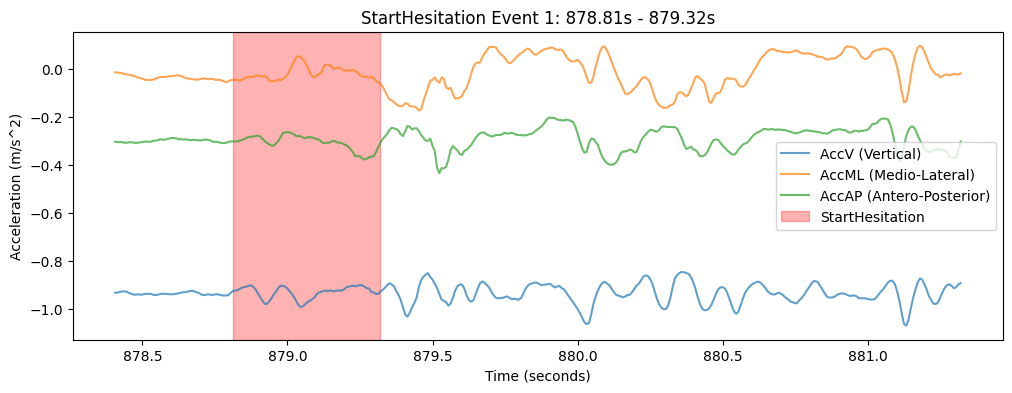

In [7]:
def plot_zoomed_fog_events(df, event="StartHesitation", margin=2, sample_rate=128):
    """
    Create zoomed-in plots around each FoG event.
    
    Parameters:
    - df: DataFrame with accelerometer signals and event columns
    - event: string, the event column to zoom in on (e.g., "StartHesitation")
    - margin: seconds before/after the event window to include
    - sample_rate: sampling rate (default 128 Hz)
    """
    df["Time_sec"] = df["Time"] / sample_rate
    
    in_event = False
    start_time = None
    event_windows = []
    
    # Find contiguous event windows
    for t, val in zip(df["Time_sec"], df[event]):
        if val == 1 and not in_event:
            in_event = True
            start_time = t
        elif val == 0 and in_event:
            in_event = False
            event_windows.append((start_time, t))
    if in_event:
        event_windows.append((start_time, df["Time_sec"].iloc[-1]))
    
    # Plot each event window
    for i, (start, end) in enumerate(event_windows, 1):
        fig, ax = plt.subplots(figsize=(12, 4))
        mask = (df["Time_sec"] >= start - margin) & (df["Time_sec"] <= end + margin)
        sub_df = df.loc[mask]
        
        ax.plot(sub_df["Time_sec"], sub_df["AccV"], label="AccV (Vertical)", alpha=0.7)
        ax.plot(sub_df["Time_sec"], sub_df["AccML"], label="AccML (Medio-Lateral)", alpha=0.7)
        ax.plot(sub_df["Time_sec"], sub_df["AccAP"], label="AccAP (Antero-Posterior)", alpha=0.7)

        if (event == "Turn"): color = "green"
        elif (event == "Walking"): color = "blue"
        else: color = "red"
        
        ax.axvspan(start, end, color=color, alpha=0.3, label=event)
        
        ax.set_title(f"{event} Event {i}: {round(start,2)}s - {round(end,2)}s")
        ax.set_xlabel("Time (seconds)")
        ax.set_ylabel("Acceleration (m/s^2)")
        ax.legend()
        plt.show()

plot_zoomed_fog_events(df_1, "Turn")
plot_zoomed_fog_events(df_3, "Walking")
plot_zoomed_fog_events(df_3)

In [8]:
import random
all_files = [os.path.join(defog_path, f) for f in os.listdir(defog_path) if f.endswith(".csv")]

# Randomly pick 50 files
sample_files = random.sample(all_files, 50)

# Load them into one DataFrame
dfs = []
for f in sample_files:
    df = pd.read_csv(f)
    df["file_id"] = os.path.basename(f)  # add file id to track source
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

print("Combined shape:", combined_df.shape)
print("Columns:", combined_df.columns)

Combined shape: (6855566, 10)
Columns: Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking',
       'Valid', 'Task', 'file_id'],
      dtype='object')


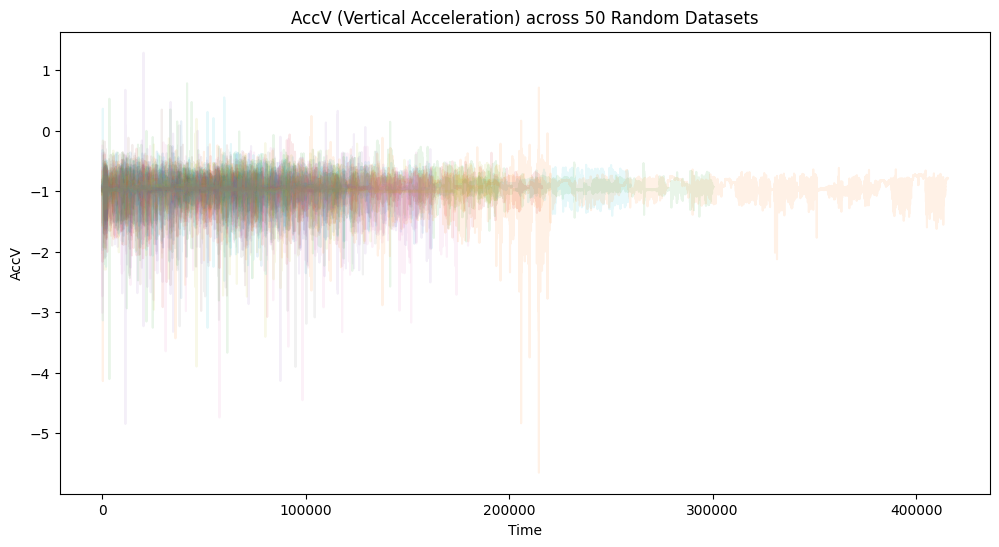

In [9]:
# Visualizations - Overlay all accelerometer signals (with transparency):
plt.figure(figsize=(12, 6))
for fid, group in combined_df.groupby("file_id"):
    plt.plot(group["Time"], group["AccV"], alpha=0.1)  # vertical acceleration
plt.title("AccV (Vertical Acceleration) across 50 Random Datasets")
plt.xlabel("Time")
plt.ylabel("AccV")
plt.show()

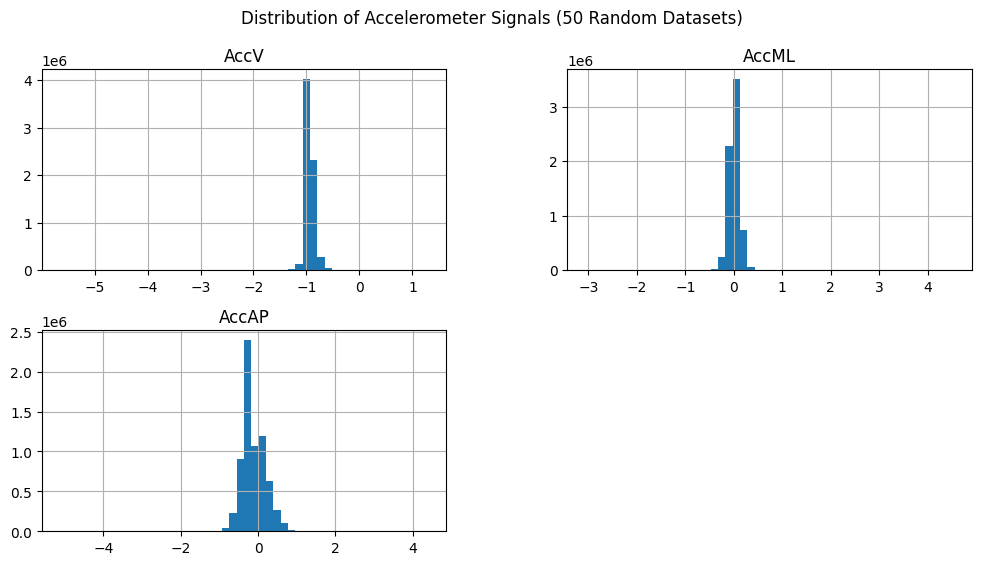

In [10]:
# Distribution of acceleration values across all datasets:

combined_df[["AccV","AccML","AccAP"]].hist(bins=50, figsize=(12,6))
plt.suptitle("Distribution of Accelerometer Signals (50 Random Datasets)")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

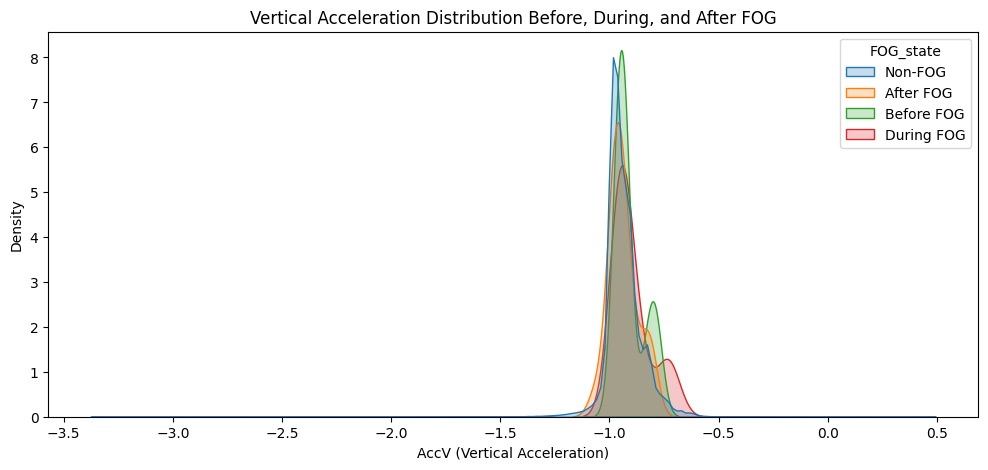

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

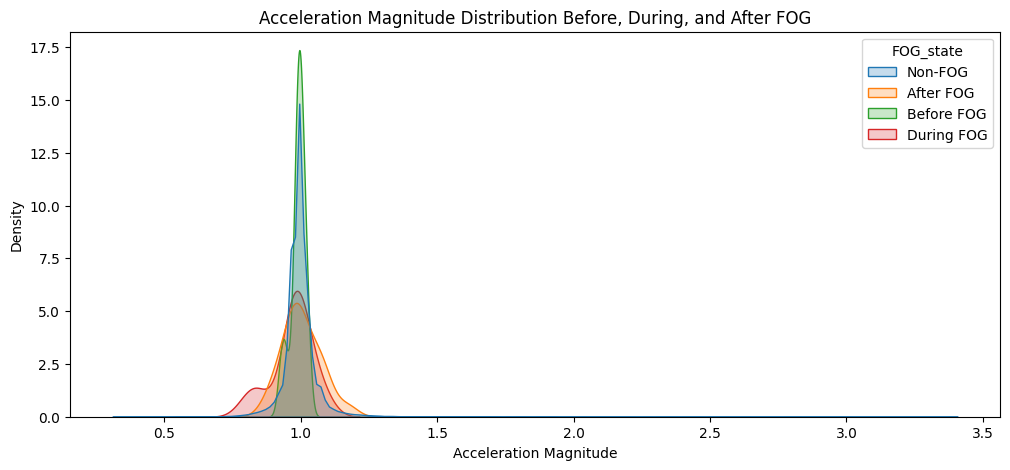

In [11]:
import seaborn as sns

# Assume StartHesitation column exists
df = combined_df.copy()
fs = 100
window = 2 * fs  # 2 seconds before/after
df["FOG_state"] = "Non-FOG"

# Identify event start and end indices
fog_mask = df["StartHesitation"] == 1
diffs = fog_mask.astype(int).diff().fillna(0)
start_idxs = diffs[diffs == 1].index
end_idxs = diffs[diffs == -1].index

# Handle edge cases
if len(end_idxs) < len(start_idxs):
    end_idxs = end_idxs.append(pd.Index([len(df)-1]))

# Mark FOG and surrounding regions
for start, end in zip(start_idxs, end_idxs):
    df.loc[start:end, "FOG_state"] = "During FOG"
    df.loc[max(0, start-window):start, "FOG_state"] = "Before FOG"
    df.loc[end:min(len(df)-1, end+window), "FOG_state"] = "After FOG"

# Optional: downsample for faster plotting
df_sample = df.sample(frac=0.05, random_state=42)  # 5% of data

# Compute magnitude
df_sample["AccMag"] = np.sqrt(
    df_sample["AccV"]**2 + df_sample["AccML"]**2 + df_sample["AccAP"]**2
)

# Plot vertical acceleration
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df_sample, x="AccV", hue="FOG_state", fill=True, common_norm=False)
plt.title("Vertical Acceleration Distribution Before, During, and After FOG")
plt.xlabel("AccV (Vertical Acceleration)")
plt.show()

# Plot magnitude
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df_sample, x="AccMag", hue="FOG_state", fill=True, common_norm=False)
plt.title("Acceleration Magnitude Distribution Before, During, and After FOG")
plt.xlabel("Acceleration Magnitude")
plt.show()


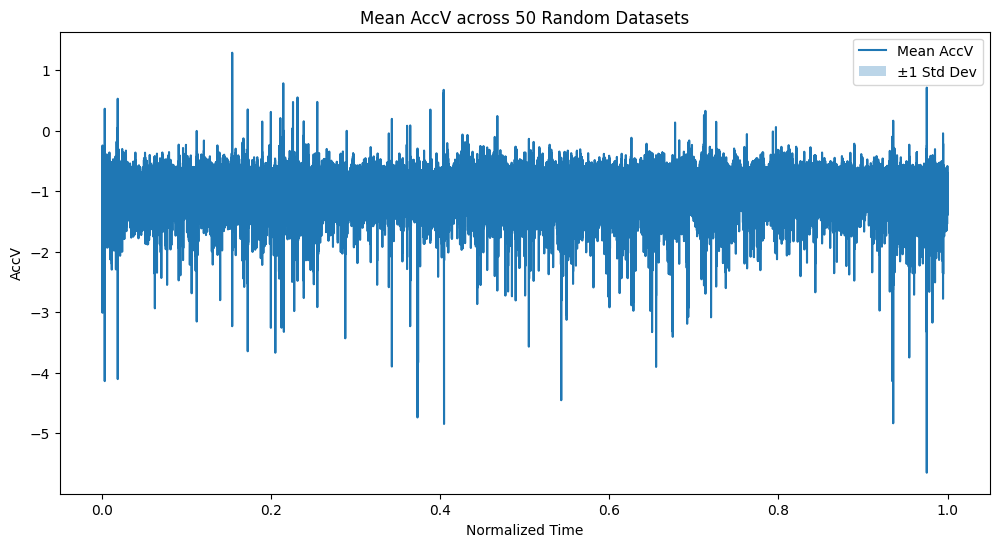

In [12]:
# Normalize time since different files have different lengths
combined_df["norm_time"] = combined_df.groupby("file_id")["Time"].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

avg = combined_df.groupby("norm_time")["AccV"].mean()
std = combined_df.groupby("norm_time")["AccV"].std()

plt.figure(figsize=(12,6))
plt.plot(avg.index, avg, label="Mean AccV")
plt.fill_between(avg.index, avg-std, avg+std, alpha=0.3, label="±1 Std Dev")
plt.title("Mean AccV across 50 Random Datasets")
plt.xlabel("Normalized Time")
plt.ylabel("AccV")
plt.legend()
plt.show()

In [13]:
def plot_fog_event_windows(df, event_col, sample_n=5, window_sec=15, fs=128):
    """
    Zoom in on event windows for a given FoG event type.
    
    df: DataFrame with Time, AccV, AccML, AccAP, and event columns
    event_col: str, name of event column ("StartHesitation", "Turn", "Walking")
    sample_n: number of event windows to sample
    window_sec: seconds before/after event to plot
    fs: sampling frequency (128Hz in this dataset)
    """
    df["Time_sec"] = df["Time"] / fs
    
    # Find event start indices
    event_indices = df.index[df[event_col] == 1].tolist()
    
    if not event_indices:
        print(f"No {event_col} events in this dataset")
        return
    
    # Pick random subset of event indices
    chosen = random.sample(event_indices, min(sample_n, len(event_indices)))
    
    plt.figure(figsize=(14, 3*len(chosen)))
    
    plotted = 0
    for i, idx in enumerate(chosen, 1):
        start = max(0, idx - window_sec * fs)
        end   = min(len(df), idx + window_sec * fs)
        window = df.iloc[start:end]
        
        if window.empty:  # safety check
            continue
        
        plotted += 1
        plt.subplot(len(chosen), 1, plotted)
        plt.plot(window["Time_sec"], window["AccV"], label="AccV")
        plt.plot(window["Time_sec"], window["AccML"], label="AccML")
        plt.plot(window["Time_sec"], window["AccAP"], label="AccAP")
        
        # Highlight the actual FoG points inside window
        fog_times = window.loc[window[event_col] == 1, "Time_sec"]
        for t in fog_times:
            plt.axvline(x=t, color="red", alpha=0.02)  # vertical line at event points
        
        plt.title(f"{event_col} Event Example {plotted}")
        plt.xlabel("Time (sec)")
        plt.ylabel("Acceleration")
        if plotted == 1:
            plt.legend()
    
    if plotted == 0:
        print(f"Could not find valid {event_col} windows to plot.")
    else:
        plt.tight_layout()
        plt.show()

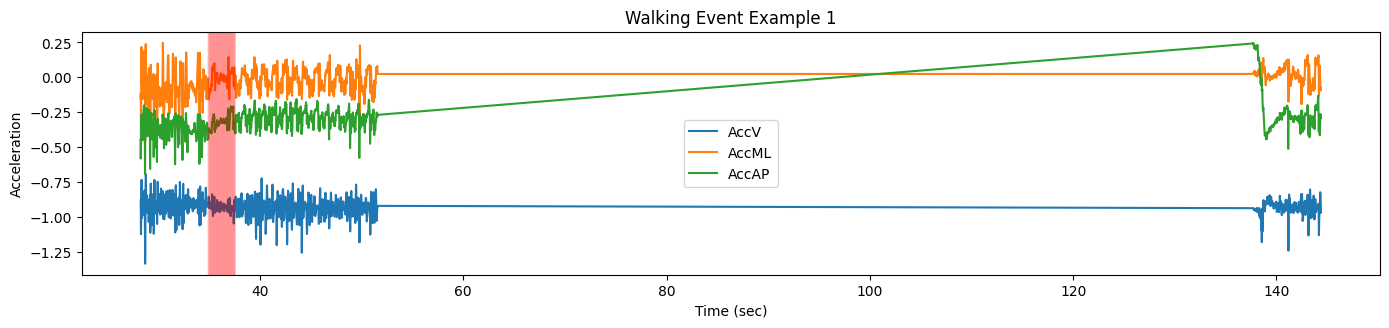

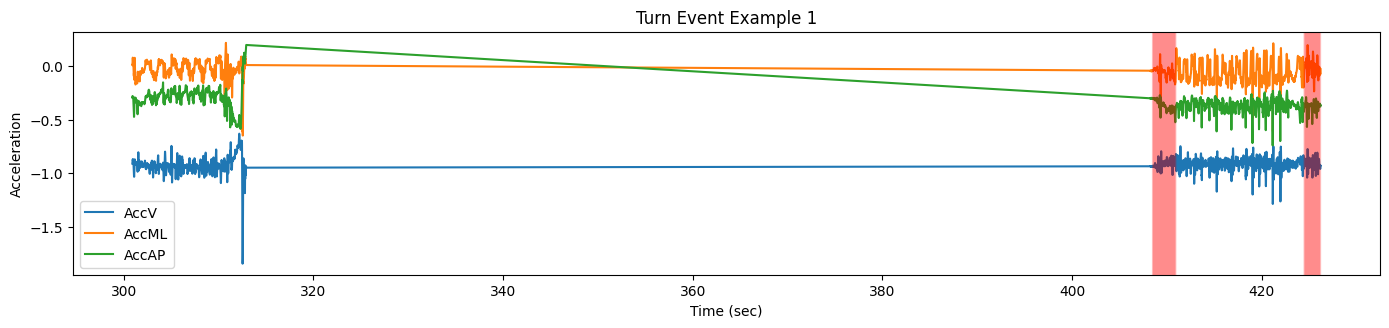

In [14]:
plot_fog_event_windows(df_3, "Walking", sample_n=5)
plot_fog_event_windows(df_3, "Turn", sample_n=5)

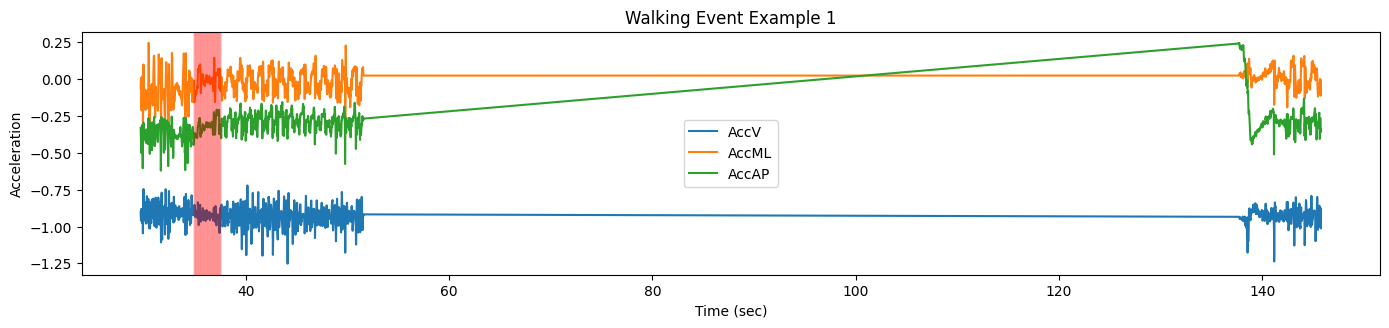

In [15]:
plot_fog_event_windows(df_3, "Walking", sample_n=5)

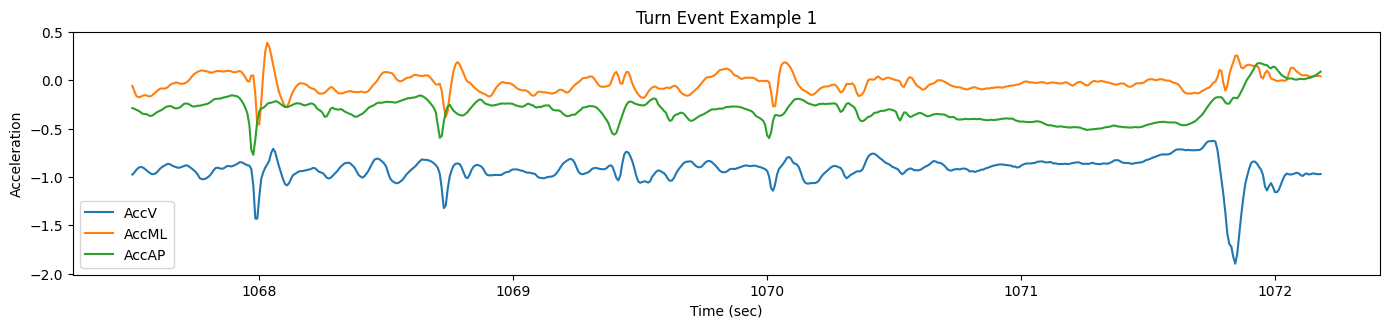

In [16]:
plot_fog_event_windows(df_3, "Turn", sample_n=5)

In [17]:
from scipy.signal import spectrogram
from scipy.stats import zscore

def plot_spectrogram(df, fs=128, nperseg=256, z_threshold=3):
    """
    Computes and plots the spectrogram of the combined accelerometer signal,
    highlighting time-frequency bins that are statistical outliers (based on z-score).

    Parameters:
        df (DataFrame): Must contain 'AccV', 'AccML', and 'AccAP' columns.
        fs (int): Sampling frequency in Hz (default = 128).
        nperseg (int): Length of each segment for FFT (default = 256).
        z_threshold (float): Z-score threshold for detecting outliers (default = 3).
    """
    # ---- 1️⃣ Combine accelerometer axes into one magnitude signal ----
    if not all(col in df.columns for col in ["AccV", "AccML", "AccAP"]):
        raise ValueError("DataFrame must contain columns: AccV, AccML, and AccAP")

    combined_signal = np.sqrt(df["AccV"]**2 + df["AccML"]**2 + df["AccAP"]**2)
    combined_signal = combined_signal - np.mean(combined_signal)  # remove DC offset

    # ---- 2️⃣ Compute spectrogram ----
    f, t, Sxx = spectrogram(combined_signal, fs=fs, nperseg=nperseg)
    Sxx_db = 10 * np.log10(Sxx + 1e-12)  # convert to dB (avoid log(0))

    # ---- 3️⃣ Compute z-scores and find outlier regions ----
    z_scores = zscore(Sxx_db.flatten())
    z_scores_reshaped = z_scores.reshape(Sxx_db.shape)
    outlier_mask = np.abs(z_scores_reshaped) > z_threshold

    # ---- 4️⃣ Plot the spectrogram ----
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t, f, Sxx_db, shading='gouraud', cmap='viridis')
    plt.colorbar(label="Power (dB)")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.title("Spectrogram with Outlier Highlighting (Possible FOG Activity)")

    # Overlay red dots for outlier frequency-time bins
    outlier_t, outlier_f = np.meshgrid(t, f)
    plt.scatter(outlier_t[outlier_mask], outlier_f[outlier_mask],
                color='red', s=8, label='Outlier (High energy)', alpha=0.4)

    plt.ylim(0, 6)  # focus on 0–10 Hz, where gait and freeze bands live
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ---- 5️⃣ Return data for downstream analysis ----
    return {
        "frequencies": f,
        "times": t,
        "spectrogram_db": Sxx_db,
        "z_scores": z_scores_reshaped,
        "outlier_mask": outlier_mask
    }